In [2]:
#module import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


import warnings
warnings.filterwarnings("ignore")

In [3]:
#font setting
plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic", rc={"axes.unicode_minus":False}, style='white')

In [4]:
#data load
waset = pd.read_csv("C:/Users/cjsso/project/waset.csv")

In [5]:
waset.head(10)

,no,분류,중복,Institution,Title,저자,Year,Pdf Link
0,1,Periodical,0,Seoul National University,2D and 3D Finite Element Method Packages of CE...,"Choon Ki Ahn, Jung Hun Park, and Wook Hyun Kwon",2007,https://waset.org/publications/10964/2d-and-3d...
1,2,Abstract,0,Seoul National University,A 3-Dimensional Memory-Based Model for Plannin...,"Minho Lee,Donghyun Back,Jaemoon Jung,Woojin Park",2016,https://waset.org/pdf/books/?id=52549&pageNumb...
2,3,Abstract,1,Seoul National University,A Framework for Designing Complex Product-Serv...,"Yoonjung An,Yongtae Park",2015,https://waset.org/pdf/books/?id=26766&pageNumb...
3,4,Periodical,0,Seoul National University,A Framework for Designing Complex Product-Serv...,"Yoonjung An,Yongtae Park",2015,https://waset.org/publications/10000960/a-fram...
4,5,Abstract,0,Seoul National University,A Literature Review of Ergonomics Sitting Stud...,"Yoonjin Lee,Dongwook Hwang,Juhee Park,Woojin Park",2016,https://waset.org/pdf/books/?id=52542&pageNumb...
5,6,Abstract,0,Seoul National University,A New Direction of Urban Regeneration: Form-Ba...,"Hyejin Song,Jin Baek",2015,https://waset.org/pdf/books/?id=49942&pageNumb...
6,7,Abstract,0,Seoul National University,A Review of In-Vehicle Network for Cloud Conne...,"Hanbhin Ryu,Ilkwon Yun",2015,https://waset.org/pdf/books/?id=21239&pageNumb...
7,8,Periodical,0,Seoul National University,A Review on Technology Forecasting Methods and...,"Daekook Kang, Wooseok Jang, Hyeonjeong Lee, an...",2013,https://waset.org/publications/2934/a-review-o...
8,9,Abstract,0,Seoul National University,A Strategic Approach for Promoting Renewable E...,Hanee Ryu,2015,https://waset.org/pdf/books/?id=34233&pageNumb...
9,10,Abstract,1,Seoul National University,A Study of Mode Choice Model Improvement Consi...,"Young-Hyun Seo,Hyunwoo Park,Dong-Kyu Kim,Seung...",2017,https://waset.org/pdf/books/?id=69640&pageNumb...


In [6]:
#drop the pdf lint column --> 불필요한 칼럼
waset.drop(['Pdf Link'], axis = 1, inplace = True)

In [7]:
#institution 빈도 분석
#waset 데이터에 가장 많이 등장한 대학교 추출
waset_inst = waset['Institution'].value_counts()

In [8]:
waset_inst = pd.DataFrame(waset_inst).reset_index()

In [9]:
waset_inst.columns = ['inst', 'count']

In [10]:
waset_inst_dev = waset_inst[waset_inst['count']>=40]

In [11]:
waset_inst_dev.inst = waset_inst_dev.inst.str.replace("University", "")
waset_inst_dev.inst = waset_inst_dev.inst.str.replace("National", "")
waset_inst_dev.inst = waset_inst_dev.inst.str.replace("Institute of Technology", "")

In [12]:
waset_inst_dev.inst = waset_inst_dev.inst.str.replace(" ", "")

In [13]:
waset_inst_dev.inst.unique()

array(['Gangneung-Wonju', 'Sungkyunkwan', 'Seoul', 'Yonsei', 'Kyungpook',
       'Chonbuk', 'Sejong', 'Hanyang', 'Pusan', 'Korea', 'Dong-A',
       'KAIST', 'Yeungnam', 'Kumoh', 'Gyeongsang'], dtype=object)

<AxesSubplot:xlabel='count', ylabel='inst'>

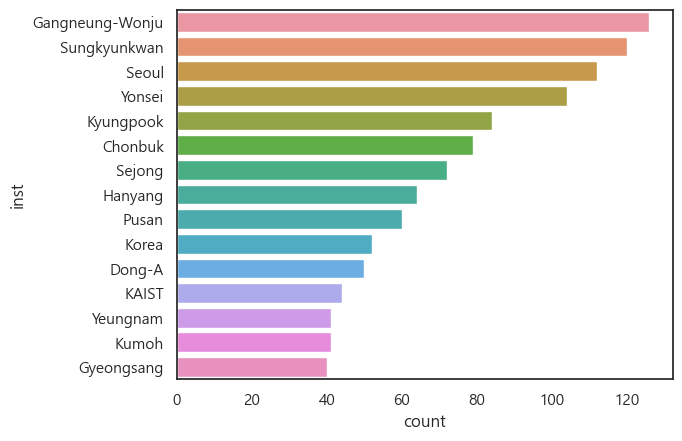

In [14]:
sns.barplot(data = waset_inst_dev, x = 'count', y = 'inst')

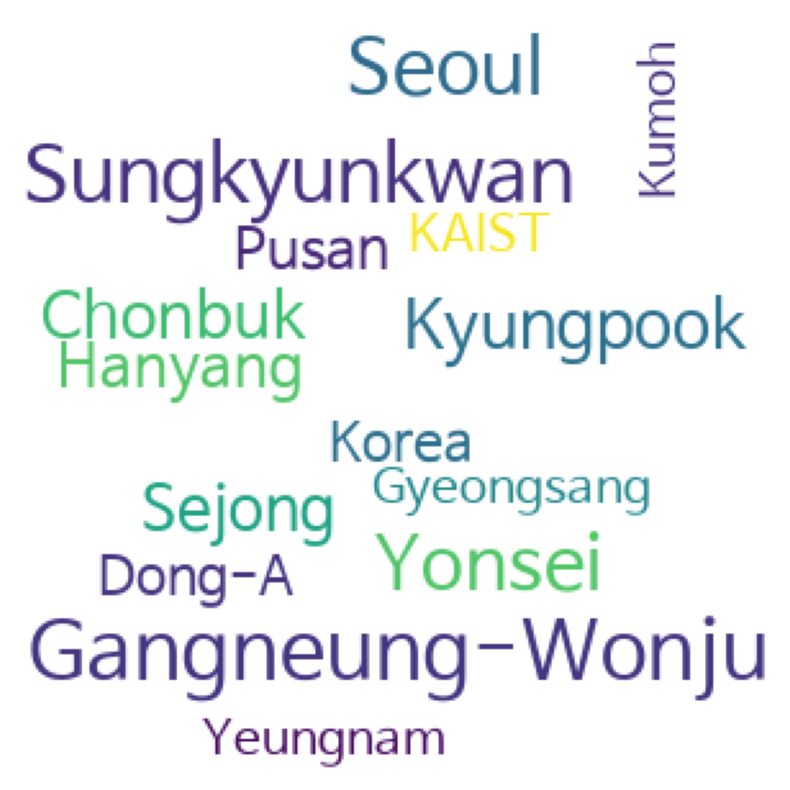

In [15]:
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 300,
    height = 300,
    background_color='white').generate_from_frequencies(waset_inst_dev.set_index('inst').to_dict()['count'])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [16]:
#title 빈도 분석
#가장 많이 등장한 논문 타이틀의 단어 분석
#가짜 학회 waset에 가장 많이 등장한 논문의 분야 유추
waset_title = waset['Title']

In [17]:
#tokenization
#woth filtering stopwords

from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.text import text_to_word_sequence

stop_words = set(stopwords.words('english'))

title_key = []

for i in range(len(waset_title)):
    sentence = waset_title[i]
    sentence  = text_to_word_sequence(sentence)
    for word in sentence:
        if word not in stop_words:
            title_key.append(word)

In [18]:
#word frequency 추출
title_words = {}
for i in title_key:
    if i not in title_words:
        title_words[i] = 1
    else:
        title_words[i] +=1

In [19]:
titles = pd.DataFrame(title_words.items())
titles.columns = ['word', 'count']

In [20]:
titles = titles.sort_values('count', ascending = False)
titles.reset_index(drop = True, inplace = True)

In [21]:
#상위 15개의 단어는 사실상 불용어임을 확인
titles.head(20)

,word,count
0,using,389
1,based,284
2,analysis,256
3,study,244
4,system,227
5,design,136
6,effect,133
7,performance,128
8,evaluation,119
9,method,112


In [22]:
num = [i for i in range(15)]
titles = titles.drop(num)

In [23]:
titles.reset_index(drop = True, inplace = True)

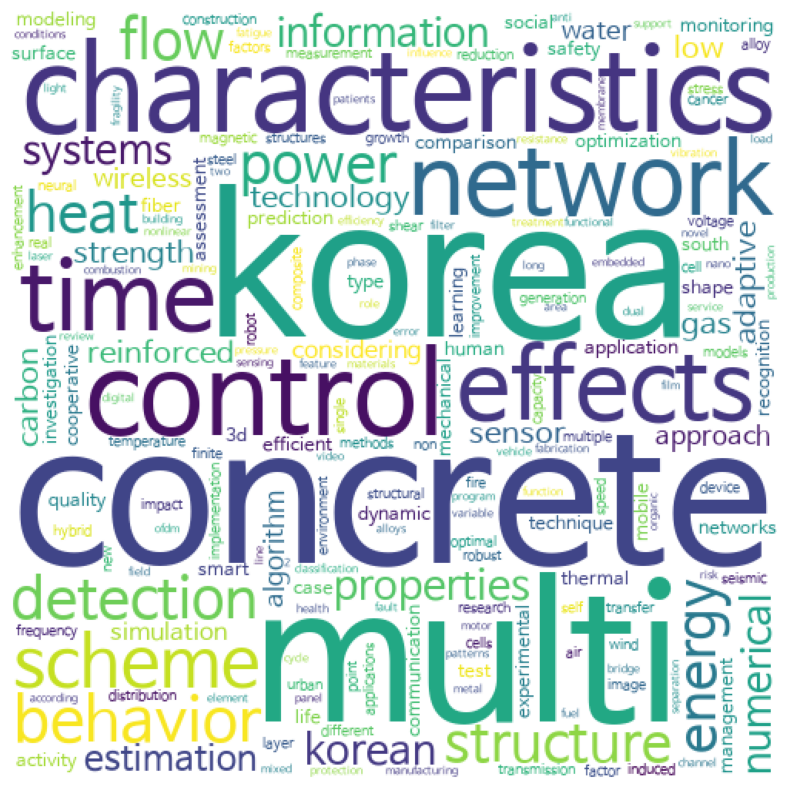

In [24]:
#wordcloud about title's word frequencies
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(titles.set_index('word').to_dict()['count'])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [37]:
#tfidfvectorize

from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
tdm = tfidf.fit_transform(title_key)

In [38]:
word_count = pd.DataFrame({
    '단어': tfidf.get_feature_names(),
    '빈도': tdm.sum(axis=0).flat
}).sort_values('빈도', ascending = False).reset_index(drop = True)

In [41]:
word_count.head(20)

,단어,빈도
0,using,389.0
1,based,284.0
2,analysis,256.0
3,study,244.0
4,system,227.0
5,design,136.0
6,effect,133.0
7,performance,128.0
8,evaluation,119.0
9,method,112.0


In [25]:
#author 빈도 분석
#가짜 학회 waset에 가장 많이 논문을 기재한 저자 확인
waset_auth = waset['저자']

In [26]:
#text preprocessing
author_key = []

for i in range(len(waset_auth)):
    names = waset_auth[i]
    names = names.split(",")
    author_key.append(names)

In [27]:
#and 제거 
import re

author = []

for i in range(len(author_key)):
    for k in range(len(author_key[i])):
        name = author_key[i][k]
        if name.find("and ") != (-1):
            name = name.replace('and ', '')
            author.append(name)
        else:
            author.append(name)

In [28]:
#name frequency 추출
freq = {}
for i in author:
    if i not in freq:
        freq[i] = 1
    else:
        freq[i] +=1

In [29]:
author_df = pd.DataFrame(freq.items())
author_df.columns = ["name", "freq"]
author_df = author_df.sort_values(["freq"], ascending = False)

In [30]:
author_df.reset_index(drop = True, inplace = True)
author_df.head(10)

,name,freq
0,Hyoung-Kyu Song,40
1,Tae Kwon Ha,36
2,Man Young Kim,27
3,Jung-Ho Moon,25
4,Woo Young Jung,22
5,Gyo Woo Lee,21
6,Young-Seok Choi,19
7,Tae Kwon Ha,19
8,Seok Hong Min,18
9,Daniel Y. Abebe,16


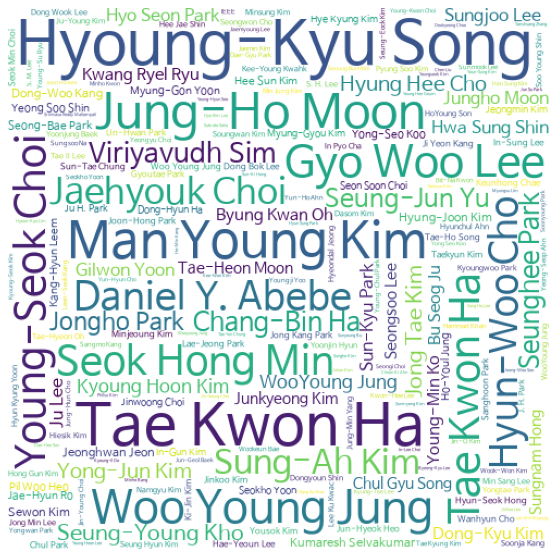

In [ ]:
#wordcloud about namefrequencies
wc = WordCloud(font_path = 'C:\\Users\\cjsso\\AppData\\Local\\Microsoft\\Windows\\Fonts\\NanumBarunGothic.ttf',
    width = 500,
    height = 500,
    background_color='white').generate_from_frequencies(author_df.set_index('name').to_dict()['freq'])


plt.figure(figsize = (10, 10))
plt.imshow(wc)
plt.axis('off')
plt.show()

In [ ]:
#가장 많이 논문을 게재한 상위 5명의 교수 소속
waset[waset["저자"].str.contains('Hyoung-Kyu Song')] #송형규 교수 소속 확인

,no,분류,중복,Institution,Title,저자,Year
750,751,Periodical,0,Sejong University,A Cooperative Transmission Scheme Using Two So...,"Bit-Na Kwon,Dong-Hyun Ha,Hyoung-Kyu Song",2015
751,752,Abstract,1,Sejong University,A Cooperative Transmission Scheme Using Two So...,"Bit-Na Kwon,Dong-Hyun Ha,Hyoung-Kyu Song",2016
753,754,Periodical,0,Sejong University,A Novel Design for Hybrid Space-Time Block Cod...,"Seung-Jun Yu, Jang-Kyun Ahn, Eui-Young Lee and...",2011
757,758,Abstract,0,Sejong University,Adaptive Cooperative Scheme Considering the Us...,"Bit-Na Kwon,Hyun-Jee Yang,Dong-Hyun Ha,Hyoung-...",2014
758,759,Abstract,1,Sejong University,Adaptive Transmission Scheme Based on Channel ...,"Seung-Jun Yu,Yong-Jun Kim,Jung-In Baik,Hyoung-...",2015
759,760,Periodical,0,Sejong University,Adaptive Transmission Scheme Based on Channel ...,"Seung-Jun Yu,Yong-Jun Kim,Jung-In Baik,Hyoung-...",2016
760,761,Abstract,0,Sejong University,Advanced CoMP Scheme for LTE-based V2X System,"Su-Hyun Jung,Young-Su Ryu,Yong-Jun Kim,Hyoung-...",2012
761,762,Abstract,1,Sejong University,An Adaptive Cooperative Scheme for Reliability...,"Hyun-Jun Shin,Jae-Jeong Kim,Hyoung-Kyu Song",2014
762,763,Periodical,0,Sejong University,An Adaptive Cooperative Scheme for Reliability...,"Hyun-Jun Shin,Jae-Jeong Kim,Hyoung-Kyu Song",2014
763,764,Abstract,0,Sejong University,An Efficient Strategy for Relay Selection in ...,"Jung-In Baik,Seung-Jun Yu,Young-Min Ko,Hyoung-...",2017


In [ ]:
waset[waset["저자"].str.contains('Tae Kwon Ha')] #하태권 교수 소속 확인

,no,분류,중복,Institution,Title,저자,Year
338,339,Periodical,0,Gangneung-Wonju National University,A Car Parking Monitoring System Using Wireless...,"Jung-Ho Moon, Tae Kwon Ha",2013
341,342,Abstract,1,Gangneung-Wonju National University,A Wireless Sensor Network Protocol for a Car P...,"Jung-Ho Moon,Myung-Gon Yoon,Tae Kwon Ha",2014
342,343,Periodical,0,Gangneung-Wonju National University,A Wireless Sensor Network Protocol for a Car P...,"Jung-Ho Moon,Myung-Gon Yoon,Tae Kwon Ha",2014
343,344,Periodical,0,Gangneung-Wonju National University,Aging Effect on Mechanical Behavior of Duplex ...,"Jungho Moon, Tae Kwon Ha",2015
344,345,Abstract,1,Gangneung-Wonju National University,Aging Effect on Mechanical Behavior of Duplex ...,"Jeonho Moon,Tae Kwon Ha",2015
345,346,Abstract,1,Gangneung-Wonju National University,Alloying Effect on Hot Workability of M42 High...,"Jung-Ho Moon,Tae Kwon Ha",2014
346,347,Periodical,0,Gangneung-Wonju National University,Alloying Effect on Hot Workability of M42 High...,"Jung-Ho Moon,Tae Kwon Ha",2014
349,350,Abstract,1,Gangneung-Wonju National University,Broadcasting Stabilization for Dynamical Multi...,"Myung-Gon Yoon,Jung-Ho Moon,Tae Kwon Ha",2014
350,351,Periodical,0,Gangneung-Wonju National University,Broadcasting Stabilization for Dynamical Multi...,"Myung-Gon Yoon,Jung-Ho Moon,Tae Kwon Ha",2014
355,356,Abstract,1,Gangneung-Wonju National University,Carbide Structure and Fracture Toughness of Hi...,"Jung-Ho Moon, Tae Kwon Ha",2014


In [ ]:
waset[waset["저자"].str.contains('Man Young Kim')] #김만용 교수 소속 확인

,no,분류,중복,Institution,Title,저자,Year
548,549,Abstract,0,Chonbuk National University,A Numerical Study on the Flow in a Pipe with P...,"Myeong Hee Jeong,Man Young Kim",2014
558,559,Abstract,1,Chonbuk National University,Combustion and Emission Characteristics in a C...,"Selvakuma Kumaresh,Man Young Kim",2014
559,560,Periodical,0,Chonbuk National University,Combustion and Emission Characteristics in a C...,"Selvakuma Kumaresh,Man Young Kim",2014
568,569,Abstract,0,Chonbuk National University,Effect of Injector Installation Angle on the T...,Man Young Kim,2016
569,570,Periodical,0,Chonbuk National University,Effect of Scale on Slab Heat Transfer in a Wal...,Man Young Kim,2013
570,571,Periodical,0,Chonbuk National University,Effect of Swirl on Gas-Fired Combustion Behavi...,Man Young Kim,2012
571,572,Abstract,0,Chonbuk National University,Effect of Swirling Mixer on the Exhaust Flow i...,"Doo Ki Lee,Kumaresh Selvakumar,Man Young Kim,I...",2017
581,582,Abstract,0,Chonbuk National University,Investigation of Flow Behavior inside the Sing...,"Kumaresh Selvakumar,Man Young Kim",2017
582,583,Abstract,0,Chonbuk National University,Investigation of Soot Regeneration Behavior in...,"Won Jun Jo,Man Young Kim",2016
583,584,Abstract,1,Chonbuk National University,Investigation of the Flow Characteristics in a...,"Gyo Woo Lee,Man Young Kim",2014


In [ ]:
waset[waset["저자"].str.contains('Jung-Ho Moon')] #문정호 교수 소속 확인

,no,분류,중복,Institution,Title,저자,Year
338,339,Periodical,0,Gangneung-Wonju National University,A Car Parking Monitoring System Using Wireless...,"Jung-Ho Moon, Tae Kwon Ha",2013
339,340,Abstract,1,Gangneung-Wonju National University,A Transfer Function Representation of Thermo-A...,"Myunggon Yoon,Jung-Ho Moon",2016
340,341,Periodical,0,Gangneung-Wonju National University,A Transfer Function Representation of Thermo-A...,"Myunggon Yoon,Jung-Ho Moon",2016
341,342,Abstract,1,Gangneung-Wonju National University,A Wireless Sensor Network Protocol for a Car P...,"Jung-Ho Moon,Myung-Gon Yoon,Tae Kwon Ha",2014
342,343,Periodical,0,Gangneung-Wonju National University,A Wireless Sensor Network Protocol for a Car P...,"Jung-Ho Moon,Myung-Gon Yoon,Tae Kwon Ha",2014
345,346,Abstract,1,Gangneung-Wonju National University,Alloying Effect on Hot Workability of M42 High...,"Jung-Ho Moon,Tae Kwon Ha",2014
346,347,Periodical,0,Gangneung-Wonju National University,Alloying Effect on Hot Workability of M42 High...,"Jung-Ho Moon,Tae Kwon Ha",2014
349,350,Abstract,1,Gangneung-Wonju National University,Broadcasting Stabilization for Dynamical Multi...,"Myung-Gon Yoon,Jung-Ho Moon,Tae Kwon Ha",2014
350,351,Periodical,0,Gangneung-Wonju National University,Broadcasting Stabilization for Dynamical Multi...,"Myung-Gon Yoon,Jung-Ho Moon,Tae Kwon Ha",2014
355,356,Abstract,1,Gangneung-Wonju National University,Carbide Structure and Fracture Toughness of Hi...,"Jung-Ho Moon, Tae Kwon Ha",2014


In [ ]:
waset[waset["저자"].str.contains('Woo Young Jung')] #정우영 교수 소속 확인

,no,분류,중복,Institution,Title,저자,Year
351,352,Abstract,1,Gangneung-Wonju National University,Buckling Resistance of Basalt Fiber Reinforced...,"Viriyavudh Sim,Woo Young Jung",2017
352,353,Periodical,0,Gangneung-Wonju National University,Buckling Resistance of Basalt Fiber Reinforced...,"Viriyavudh Sim,Woo Young Jung",2017
366,367,Abstract,1,Gangneung-Wonju National University,Design and Performance Evaluation of Hybrid Co...,"Woo Young Jung,Sung Min Park,Ho Young Son,Viri...",2015
367,368,Periodical,0,Gangneung-Wonju National University,Design and Performance Evaluation of Hybrid Co...,"Woo Young Jung,Sung Min Park,Ho Young Son,Viri...",2015
370,371,Periodical,0,Gangneung-Wonju National University,Dissipation of Higher Mode using Numerical Int...,"Jin Sup Kim, Woo Young Jung, and Minho Kwon",2013
386,387,Periodical,0,Gangneung-Wonju National University,Evaluation of Performance Requirements for Sei...,Bu Seog Ju and Woo Young Jung,2013
387,388,Abstract,1,Gangneung-Wonju National University,Evaluation of Structural Behavior of Wide Slee...,"Seong Hyeok Lee,Jin Wook Lee,Bu Seog Ju,Woo Yo...",2014
388,389,Periodical,0,Gangneung-Wonju National University,Evaluation of Structural Behavior of Wide Slee...,"Seong Hyeok Lee,Jin Wook Lee,Bu Seog Ju,Woo Yo...",2014
397,398,Periodical,0,Gangneung-Wonju National University,High Temperature Deformation Behavior of Cr-co...,"Seok Hong Min, Woo Young Jung, and Tae Kwon Ha",2013
398,399,Periodical,0,Gangneung-Wonju National University,Hot Workability of High Strength Low Alloy Steels,"Seok Hong Min, Jung Ho Moon, Woo Young Jung, a...",2013
